In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load the dataset
file_path = '/content/Hospital_patients_datasets.csv'
data = pd.read_csv(file_path)

# Convert 'ScheduledDay' and 'AppointmentDay' to datetime format
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Create new features: Appointment Weekday, Scheduled Weekday, Days Between Scheduling and Appointment
data['AppointmentWeekday'] = data['AppointmentDay'].dt.day_name()
data['ScheduledWeekday'] = data['ScheduledDay'].dt.day_name()
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

In [3]:
# Forecasting Daily Attendance

# Step 1: Preprocess the data to aggregate daily attendance
data['Attended'] = data['No-show'].apply(lambda x: 0 if x == 'Yes' else 1)
attendance_daily = data.groupby('AppointmentDay')['Attended'].sum().reset_index()


In [4]:

# Step 2: Rename columns for Prophet ('ds' for date, 'y' for the target)
attendance_daily.columns = ['ds', 'y']

# Ensure the 'ds' column is in datetime format and without timezone
attendance_daily['ds'] = pd.to_datetime(attendance_daily['ds']).dt.tz_localize(None)

# Ensure 'y' is numeric
attendance_daily['y'] = pd.to_numeric(attendance_daily['y'], errors='coerce')

# Drop any rows with missing values (NaNs)
attendance_daily = attendance_daily.dropna()

In [5]:
# Step 3: Initialize Prophet model for forecasting
model = Prophet()

In [6]:
# Step 4: Fit the model
model.fit(attendance_daily)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp675_kwuc/kkp68v_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp675_kwuc/qzrkgzin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93159', 'data', 'file=/tmp/tmp675_kwuc/kkp68v_7.json', 'init=/tmp/tmp675_kwuc/qzrkgzin.json', 'output', 'file=/tmp/tmp675_kwuc/prophet_modelpjnn8xvq/prophet_model-20241017170322.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:03:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:03:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [7]:


# Step 5: Create future dates for prediction (e.g., next 30 days)
future_dates = model.make_future_dataframe(periods=30)

In [8]:

# Step 6: Predict future attendance
forecast = model.predict(future_dates)

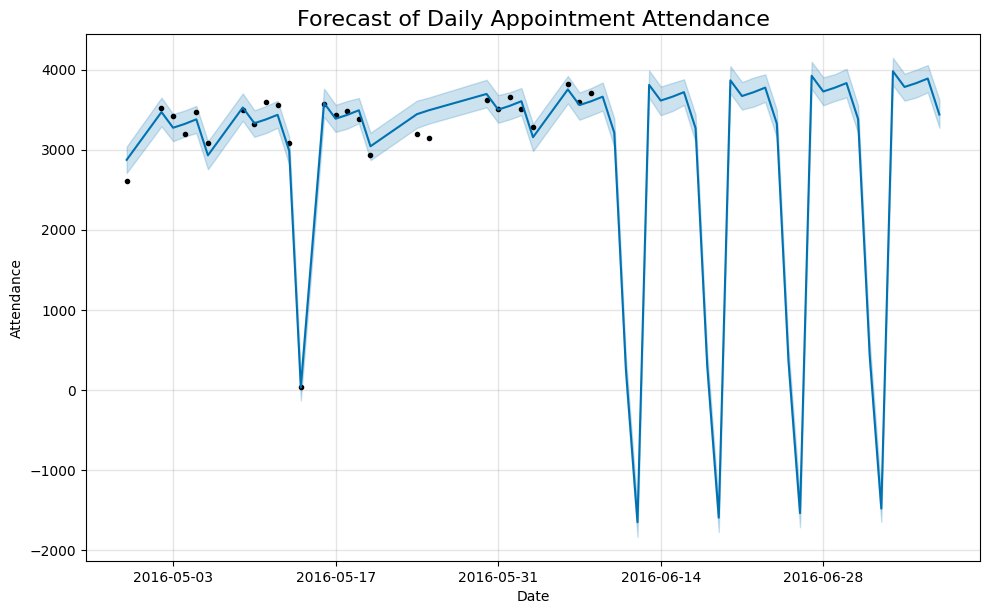

<ipython-input-9-2d7037a9a18c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='No-show', data=data, palette="Set2")


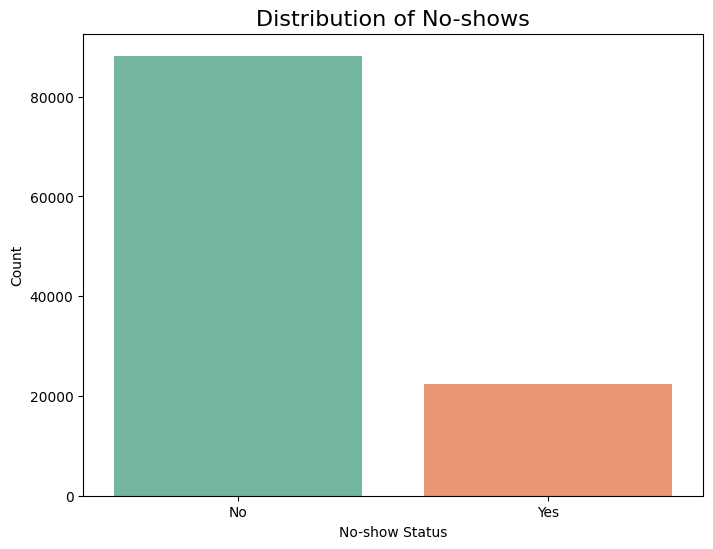

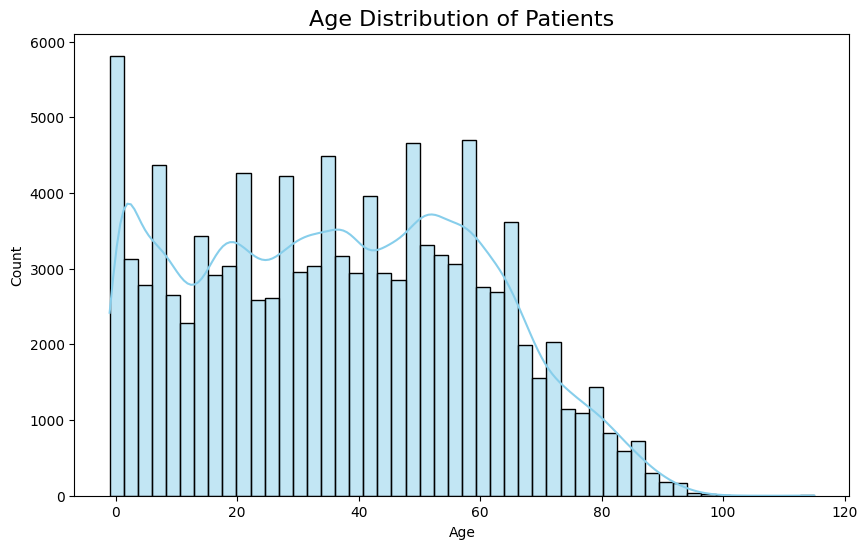

<ipython-input-9-2d7037a9a18c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='No-show', y='Age', data=data, palette="Set3")


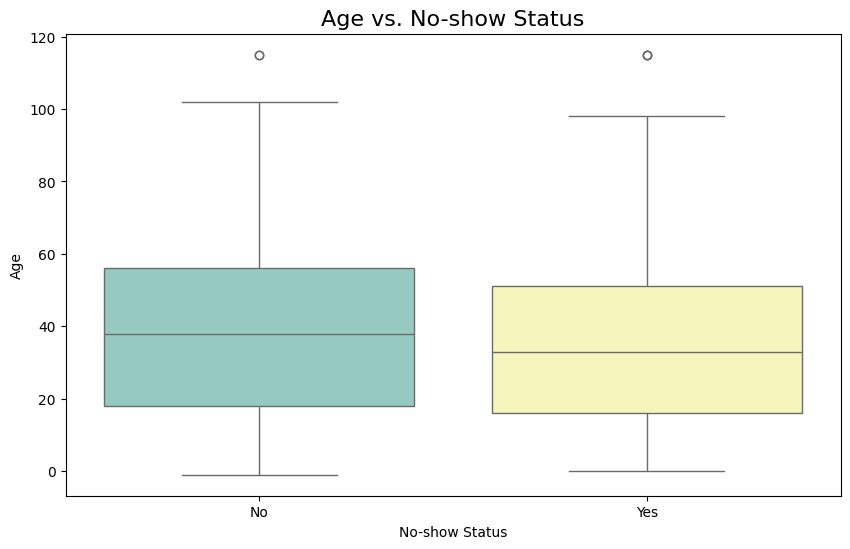

<Figure size 1200x600 with 0 Axes>

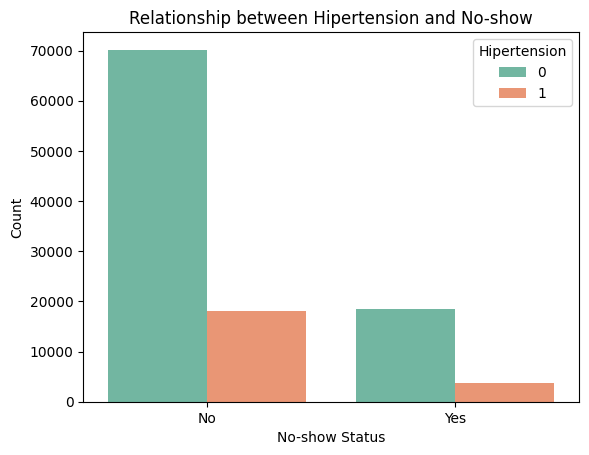

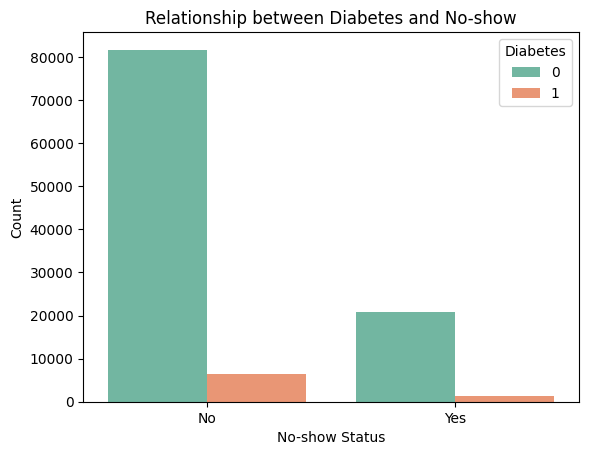

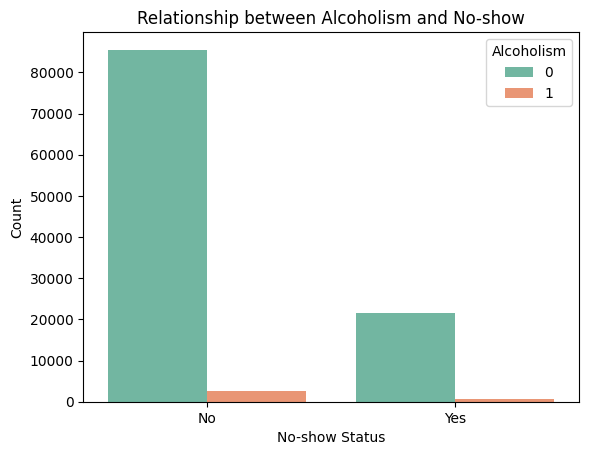

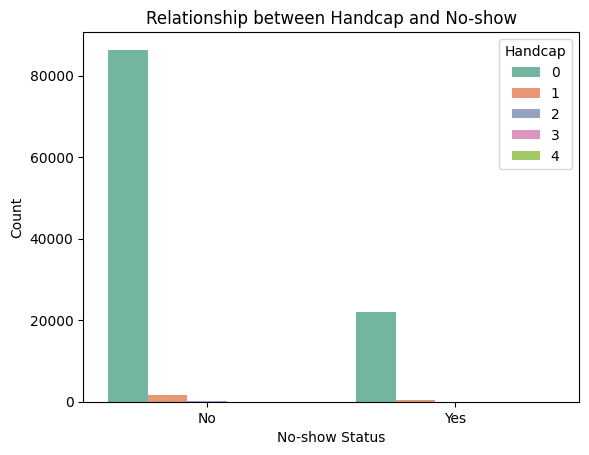

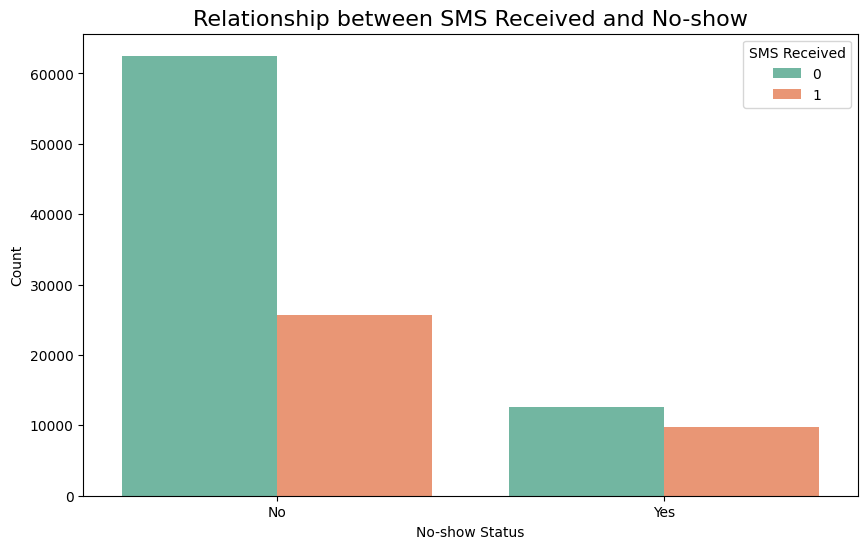

In [9]:

# Step 7: Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Daily Appointment Attendance', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.show()

# Exploratory Data Analysis Functions
def plot_no_show_distribution():
    """Plot no-show distribution"""
    plt.figure(figsize=(8, 6))
    sns.countplot(x='No-show', data=data, palette="Set2")
    plt.title('Distribution of No-shows', fontsize=16)
    plt.ylabel('Count')
    plt.xlabel('No-show Status')
    plt.show()

def plot_age_distribution():
    """Plot age distribution of patients"""
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='Age', bins=50, kde=True, color='skyblue')
    plt.title('Age Distribution of Patients', fontsize=16)
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

def plot_age_vs_no_show():
    """Plot relationship between Age and No-show status"""
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='No-show', y='Age', data=data, palette="Set3")
    plt.title('Age vs. No-show Status', fontsize=16)
    plt.xlabel('No-show Status')
    plt.ylabel('Age')
    plt.show()

def plot_medical_conditions_vs_no_show():
    """Plot relationship between medical conditions and No-show status"""
    plt.figure(figsize=(12, 6))
    medical_conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

    for condition in medical_conditions:
        plt.figure()
        sns.countplot(x='No-show', hue=condition, data=data, palette="Set2")
        plt.title(f'Relationship between {condition} and No-show')
        plt.ylabel('Count')
        plt.xlabel('No-show Status')
        plt.legend(title=condition)
        plt.show()

def plot_sms_vs_no_show():
    """Plot relationship between SMS reminders and No-show status"""
    plt.figure(figsize=(10, 6))
    sns.countplot(x='No-show', hue='SMS_received', data=data, palette="Set2")
    plt.title('Relationship between SMS Received and No-show', fontsize=16)
    plt.ylabel('Count')
    plt.xlabel('No-show Status')
    plt.legend(title='SMS Received', loc='upper right')
    plt.show()

# Running the analysis functions
plot_no_show_distribution()
plot_age_distribution()
plot_age_vs_no_show()
plot_medical_conditions_vs_no_show()
plot_sms_vs_no_show()